In [54]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

%matplotlib inline
sns.set(style='white', context='talk')

pca = 'imagenet'
regression = 'lin'

regions = ['EVC', 'LOC', 'PFS', 'OPA', 'PPA', 'RSC', 'FFA', 'OFA', 'STS', 'EBA']

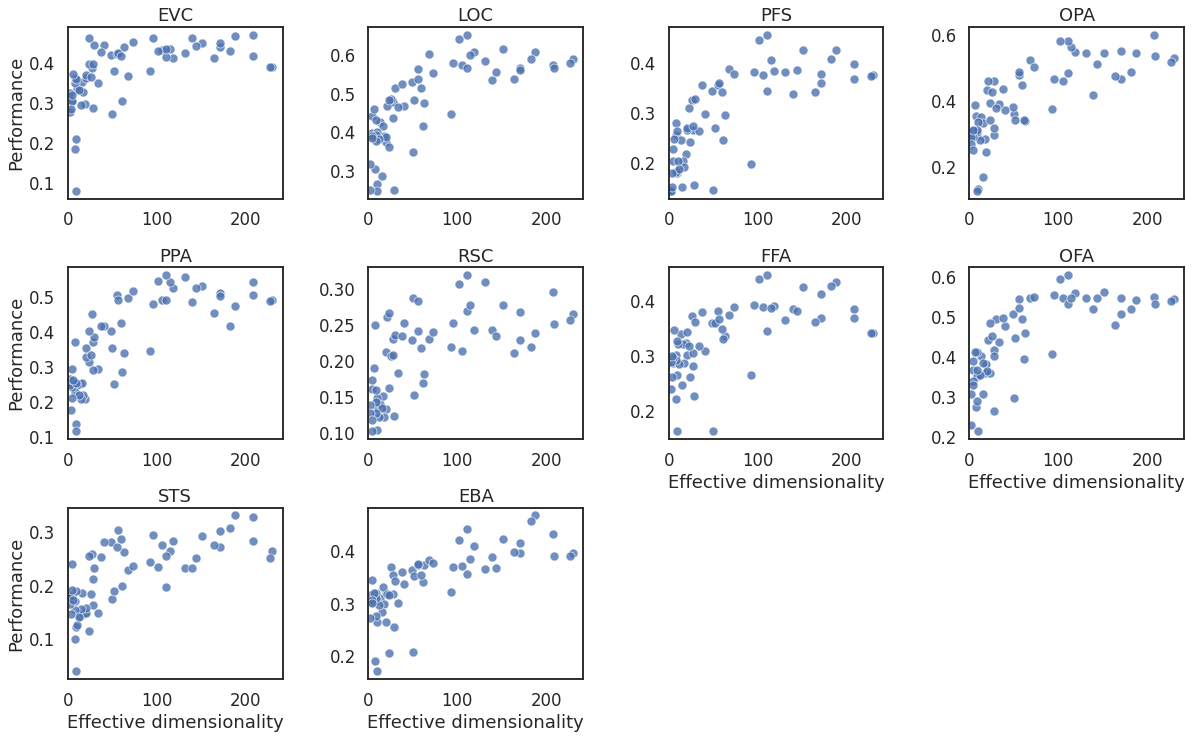

,Region,Correlation,p-value
0,EVC,0.727343,1.466185e-11
1,LOC,0.833525,2.317213e-17
2,PFS,0.820517,1.878475e-16
3,OPA,0.834821,1.862736e-17
4,PPA,0.825557,8.522893e-17
5,RSC,0.709293,7.698073e-11
6,FFA,0.726767,1.548996e-11
7,OFA,0.814372,4.764409e-16
8,STS,0.747456,1.964709e-12
9,EBA,0.829493,4.516780e-17


In [55]:
models = 'base'
results = pd.read_csv(f'../results/object2vec_rois_{models}_{regression}_roiscores.csv')

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 4,hspace=0.4,wspace=0.4)

region_idx = 0
for row in range(3):
    for col in range(4):
        region = regions[region_idx]
        ax = fig.add_subplot(gs[row, col])
        
        sns.scatterplot(x=f'effective_dimensionality_{pca}', y=region,
                        data=results, ax=ax, 
                        alpha=0.8)
        
        ax.set_title(region)
        ax.set_xlim(0, None)
        if col == 0:
            ax.set_ylabel('Performance')
        else:
            ax.set_ylabel(None)
        if row == 2 or row == 1 and col >= 2:
            ax.set_xlabel('Effective dimensionality')
        else:
            ax.set_xlabel(None)
        
        region_idx += 1
        
        if region_idx >= len(regions):
            break
    if region_idx >= len(regions):
        break

plt.show()

r, p = zip(*[stats.spearmanr(results[f'effective_dimensionality_{pca}'], results[roi]) 
                                     for roi in regions])
correlations = pd.DataFrame({'Region': regions, 
                             'Correlation': r, 
                             'p-value': p})
correlations

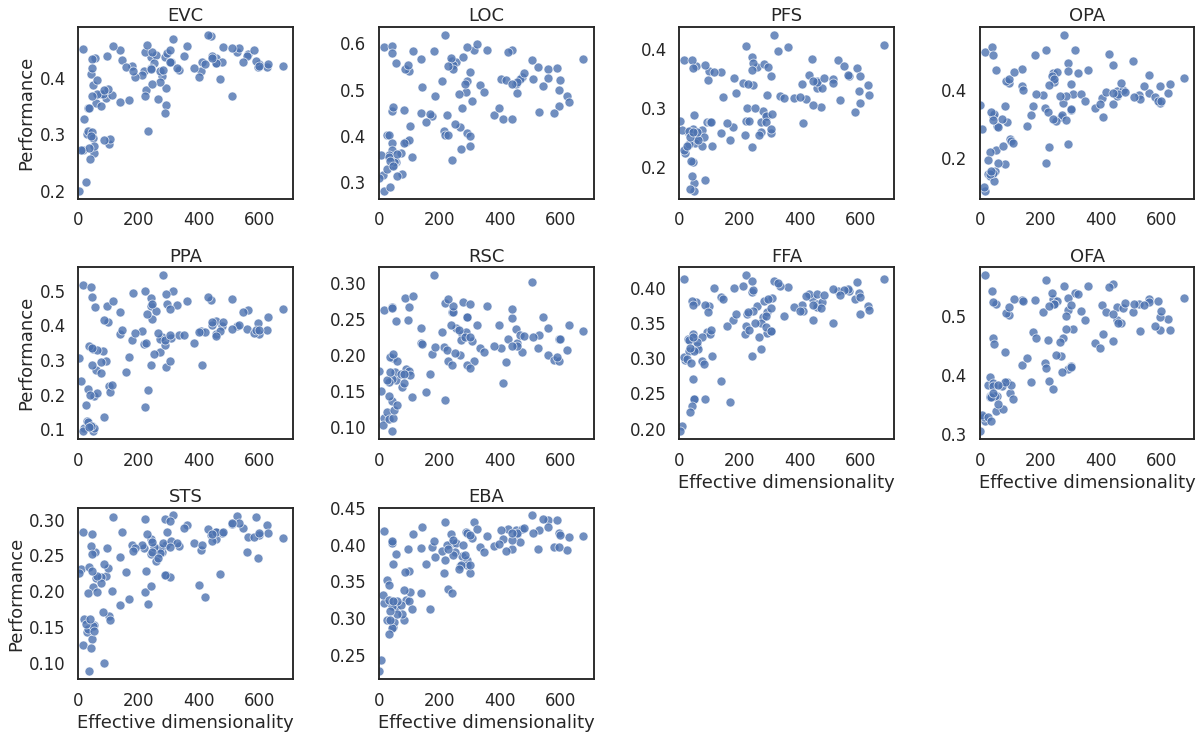

,Region,Correlation,p-value
0,EVC,0.612724,1.432700e-12
1,LOC,0.474720,1.836151e-07
2,PFS,0.519331,7.207135e-09
3,OPA,0.454796,6.762447e-07
4,PPA,0.492642,5.284378e-08
5,RSC,0.421333,5.057511e-06
6,FFA,0.627365,2.889849e-13
7,OFA,0.537300,1.705359e-09
8,STS,0.658262,7.359170e-15
9,EBA,0.709035,6.300057e-18


In [56]:
models = 'vvs'
results = pd.read_csv(f'../results/object2vec_rois_{models}_{regression}_roiscores.csv')

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 4,hspace=0.4,wspace=0.4)

region_idx = 0
for row in range(3):
    for col in range(4):
        region = regions[region_idx]
        ax = fig.add_subplot(gs[row, col])
        
        sns.scatterplot(x=f'effective_dimensionality_{pca}', y=region,
                        data=results, ax=ax, 
                        alpha=0.8)
        
        ax.set_title(region)
        ax.set_xlim(0, None)
        if col == 0:
            ax.set_ylabel('Performance')
        else:
            ax.set_ylabel(None)
        if row == 2 or row == 1 and col >= 2:
            ax.set_xlabel('Effective dimensionality')
        else:
            ax.set_xlabel(None)
        
        region_idx += 1
        
        if region_idx >= len(regions):
            break
    if region_idx >= len(regions):
        break

plt.show()

r, p = zip(*[stats.spearmanr(results[f'effective_dimensionality_{pca}'], results[roi]) 
                                     for roi in regions])
correlations = pd.DataFrame({'Region': regions, 
                             'Correlation': r, 
                             'p-value': p})
correlations